In [67]:
import pandas as pd


In [68]:
bomba_data = pd.read_csv('../data/processed/Data_train.csv')
bomba_predict = pd.read_csv('../data/processed/Data_test.csv')

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler

In [70]:
bomba_data.head().T

,0,1,2,3,4
Unnamed: 0,0.00,1.0,2.00,3.0,4.0
Basal Rate (U/h),1.95,1.6,1.95,2.7,2.2
BWZ Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Carb Ratio (U/Ex),1.00,1.9,1.00,1.1,1.5
BWZ Insulin Sensitivity (mg/dL/U),45.00,45.0,45.00,45.0,45.0
BWZ Carb Input (exchanges),9.50,3.5,5.50,4.0,7.5
BWZ BG Input (mg/dL),84.00,111.0,99.00,97.0,75.0
BWZ Correction Estimate (U),0.00,0.0,0.00,0.0,0.0
BWZ Food Estimate (U),9.50,6.6,5.50,4.4,11.2
BWZ Active Insulin (U),0.00,0.0,0.00,1.2,0.0


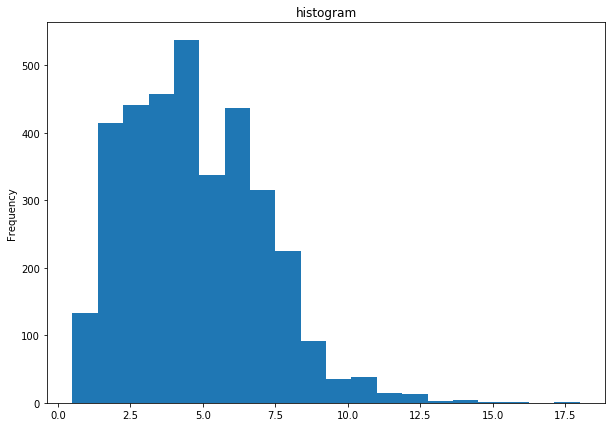

In [71]:
bomba_data['BWZ Estimate (U)'].plot(kind='hist', bins=20, title='histogram', figsize=(10, 7));

In [72]:
bomba_data.columns.tolist()

['Unnamed: 0',
 'Basal Rate (U/h)',
 'BWZ Estimate (U)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Food Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

In [73]:
# Food estimate lo quitamos de la lista por correlación = 1 con BWZ Estimate (U)

NUM_FEATS = ['Basal Rate (U/h)','BWZ Carb Ratio (U/Ex)','BWZ Insulin Sensitivity (mg/dL/U)',
             'BWZ Carb Input (exchanges)', 'BWZ BG Input (mg/dL)','BWZ Correction Estimate (U)',
             'BWZ Active Insulin (U)','BWZ Unabsorbed Insulin Total (U)']
CAT_FEATS = ['day_of_month', 'day_of_week', 'month_of_year', 'hour']
FEATS = NUM_FEATS + CAT_FEATS
TARGET = 'BWZ Estimate (U)'
FEATS


['Basal Rate (U/h)',
 'BWZ Carb Ratio (U/Ex)',
 'BWZ Insulin Sensitivity (mg/dL/U)',
 'BWZ Carb Input (exchanges)',
 'BWZ BG Input (mg/dL)',
 'BWZ Correction Estimate (U)',
 'BWZ Active Insulin (U)',
 'BWZ Unabsorbed Insulin Total (U)',
 'day_of_month',
 'day_of_week',
 'month_of_year',
 'hour']

In [74]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [75]:
# Probar strategy con mean y median
categorical_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [76]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS)])



In [77]:
pd.DataFrame(data=preprocessor.fit_transform(bomba_data)).head()

,0,1,2,3,4,5,6,7
0,4.112078,0.811676,-2.058106,1.586585,-1.180318,-0.190357,-0.410317,-0.097593
1,2.753731,6.019288,-2.058106,-0.808604,0.661402,-0.190357,-0.410317,-0.097593
2,4.112078,0.811676,-2.058106,-0.010208,-0.157141,-0.190357,-0.410317,-0.097593
3,7.022822,1.390300,-2.058106,-0.609005,-0.293564,-0.190357,1.086021,-0.097593
4,5.082326,3.704794,-2.058106,0.788188,-1.794225,-0.190357,-0.410317,-0.097593


In [78]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
bomba_train, bomba_test = train_test_split(bomba_data)

In [81]:
print(bomba_train.shape)
print(bomba_test.shape)

(2625, 15)
(875, 15)


In [82]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression


model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

In [83]:
model.fit(bomba_train[FEATS], bomba_train[TARGET]);

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
y_test = model.predict(bomba_test[FEATS])
y_train = model.predict(bomba_train[FEATS])

In [86]:
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=bomba_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=bomba_train[TARGET], squared=False)}")

test error: 0.3867318173592124
train error: 0.34619875959405433


In [87]:
r2_score(y_true = bomba_test[TARGET], y_pred = y_test)

0.97252762575154

In [57]:
from sklearn.model_selection import cross_val_score


In [60]:
scores = cross_val_score(model, 
                         bomba_data[FEATS], 
                         bomba_data[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=16, n_jobs=-1)

In [61]:
import numpy as np
np.mean(-scores)

0.3401248975326271

In [62]:
print(-scores)


[1.36911859 0.28371181 0.29534019 0.27561656 0.29988711 0.24439797
 0.1572362  0.1730935  0.2499584  0.29614012 0.29004885 0.2771422
 0.3301612  0.33551241 0.24850928 0.31612397]


In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent','constant'],
    'regressor__n_estimators': [8,16,64,128,256,512],
    'regressor__max_depth': [4,8,16,32],
    'regressor__max_features': ['auto', 'sqrt']
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=32)

grid_search.fit(bomba_data[FEATS], bomba_data[TARGET])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0204s.) Setting batch_size=2.


ValueError: Invalid parameter n_estimators for estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [65]:
grid_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [66]:
grid_search.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'